# VIF Overview

The purpose of this document is to show how VIFs from equivalent models can, seemingly, contradict each other and I propose a different approach for calculating VIFs that generalizes to any contrast.

For simplicity, I focus on a 2 condition task when illustrating when VIFs can be misleading.  Following that illustration, I propose a simple algorithm for estimating VIFs for any contrast of parameter estimates and illustrate its behavior.

## VIFS can be misleading
### Models considered
There are two conditions (A and B) in the task and the test of interest is whether the activation for A is larger than B.  There are two equivalent models considered here.  Note that "equivalence" implies the models fit exactly the same and the inferences from the models are also the same. Without loss of generality assume regresors have been centered and scaled by the standard deviation/N-1, where N is the number of observations. This implies an intercept is not needed in the model (Assume $Y$ is centered) and that $X'X$ will be a correlation matrix.
* Model 1: $Y = \beta_AX_A + \beta_BX_B + \epsilon$: 
    * $X_A$ models condition A versus baseline
    * $X_B$ models condition B versus baseline
* Model 2: $Y = \beta_{A-B}X_{A-B} + \beta_{trials}X_{trials} + \epsilon$: 
    * $X_{A-B}$ is a parametrically modulated regressor coded using 1's for A and -1's for B (modulation values are mean centered)
    * $X_{trials}$ models all trials (both A and B) and it is orthogonal to $X_{A-B}$ since the modulation values for $X_{A-B}$ are centered.
    
Note that although the models are equivalent, contrast estimates and their variances are at least proportional (if not equal) 
$$\hat\beta_A-\hat\beta_B = p \times \hat\beta_{A-B}$$
and
$$Var(\hat\beta_A-\hat\beta_B) = p^2\times Var(\hat\beta_{A-B})$$
for some real number, $p$.  Note $p$ drops out when calculating the t-statistic, which is why inferences will match between the models. Below the focus is on $Var(\hat\beta_A-\hat\beta_B)$, but the same conclusions apply to $Var(\hat\beta_{A-B})$ since the varainces are proportional.


### Important properties
I will derive the following three properties, which express the VIFs of $\hat\beta_A$, $\hat\beta_B$ and $Var(\hat\beta_A - \hat\beta_B)$ in terms of $R_{X_{AB}} = Cor(X_A, X_B)$.  These three properties allow the construction of the figure below that displays the relationship between $R_{X_{AB}}$, $VIF({\hat\beta_A})$, $VIF(\hat\beta_{A-B})$ and $Var(\hat\beta_A - \hat\beta_B)$ revealing when VIFs are helpful and when they are misleading.
* Property 1: $Var(\hat\beta_A - \hat\beta_B) \propto \frac{2}{1-R_{X_{AB}}}$
* Property 2: $VIF_{\hat\beta_A} = VIF_{\hat\beta_B}  = \frac{1}{1-R^2_{X_{AB}}}.$
* Property 3: $VIF_{\hat\beta_{A-B}} = 1$ (this simply follows from orthogonality)

### 3 Conclusions from the figure
In the figure (shown below) it is clear that when the interest is in assessing the variability of $\hat\beta_A - \hat\beta_B$ (equivalently, $\hat\beta_{A-B}$) looking at the VIFS from only Model 1 or Model 2 is not sufficient.  Instead, all VIFs as well as the sign of the correlation between $X_1$ and $X_2$ are needed to determine whether the collinearity in the model is impacting the A-B contrast estimate, regardless of model.

* Conclusion 1: The VIF of Model 2 is never informative. Since the regressors are purposely orthogonal in this model, the VIFs will always take on the minimum value of 1, which doesn't inform on whether or not the $Var(\hat\beta_A-\hat\beta_B)$ is elevated.

* Conclusion 2: If $Cor(X_1, X_2)>0$, the contrast estimate will have inflated variance if $VIF_{\hat\beta_{A}}$ is elevated.  Only when $VIF_{\hat\beta_{A}}<5$ can it be assumed that $Var(\hat\beta_A-\hat\beta_B)$ has not been impacted by collinearity. In this case $VIF_{\hat\beta_{A-B}}$ is misleading since if $VIF_{\beta_{A}}$ (Equal to $VIF_{\hat\beta_B}$) is elevated and that causes $Var(\hat\beta_A-\hat\beta_B)$ to be elevated.  This specific elevation in the variance of a contrast will be shown in the next section which introduces a new VIF estimator that can work with any contrast.  

* Conclusion 3: If $Cor(X_1, X_2)<0$, then there isn't any concern about the impact of collinearity on $Var(\hat\beta_A-\hat\beta_B)$, but Model 1's VIFs do still inform on $Var(\hat\beta_A)$ and $Var(\hat\beta_B)$. In this case the VIFs of Model 1 are misleading and may be accidentally viewed as negatively impacting $Var(\hat\beta_A-\hat\beta_B)$.  Importantly, the VIFs do still inform about the $Var(\hat\beta_A)$ and $Var(\hat\beta_B)$ if those contrasts are also being studied.


Note, for comparison I'm adding the proposed contrast VIF estimate given below that, instead, defines the VIF as the ratio of "worst" to "best" case scenarios as with the correlation between condition versus without correlation between the conditions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
figure_output_path = (
    '/Users/jeanettemumford/Dropbox/Research/Projects/russ/MID_paper_figures_revision'
)

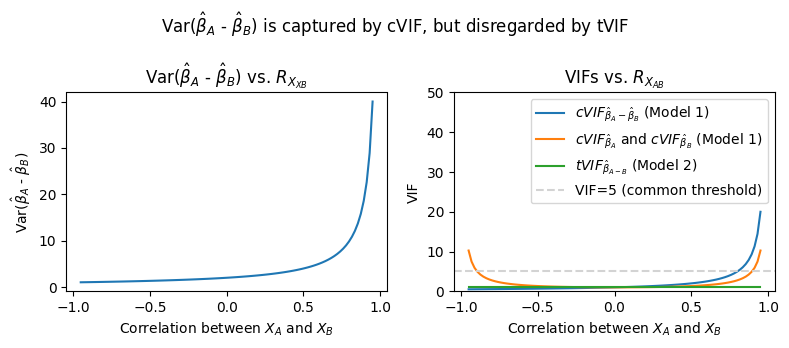

In [18]:
rab = np.linspace(-0.95, 0.95, 100)
var_diff = 2 / (1 - rab)

vif_a_and_b = 1 / (1 - rab**2)
vif_a_minus_b_mod2 = np.ones(rab.shape)
vif_a_minus_b_mod1 = 1 / (1 - rab)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))
fig.suptitle(
    r'Var($\hat\beta_A$ - $\hat\beta_B$) is captured by cVIF, but disregarded by tVIF'
)

ax[0].plot(rab, var_diff, label=r'Var($\hat\beta_A$ - $\hat\beta_B$)')
ax[0].set_xlabel(r'Correlation between $X_A$ and $X_B$')
ax[0].set_ylabel(r'Var($\hat\beta_A$ - $\hat\beta_B$)')
ax[0].set_title(r'Var($\hat\beta_A$ - $\hat\beta_B$) vs. $R_{X_{XB}}$')

ax[1].plot(rab, vif_a_minus_b_mod1, label=r'$cVIF_{\hat\beta_A-\hat\beta_B}$ (Model 1)')
ax[1].plot(
    rab, vif_a_and_b, label=r'$cVIF_{\hat\beta_A}$ and $cVIF_{\hat\beta_B}$ (Model 1)'
)
ax[1].plot(rab, vif_a_minus_b_mod2, label=r'$tVIF_{\hat\beta_{A-B}}$ (Model 2)')
plt.axhline(y=5, color='lightgray', linestyle='--', label='VIF=5 (common threshold)')
plt.xlabel(r'Correlation between $X_A$ and $X_B$')
plt.ylim(0, 50)
plt.ylabel('VIF')
plt.title(r'VIFs vs. $R_{X_{AB}}$')
plt.legend()
plt.tight_layout()
plt.savefig(f'{figure_output_path}/vif_illustration.pdf')
plt.show()

# For the curious reader: Derivations of the 3 properties used in the figure
Let $X$ be the design matrix from Model 1 containing the two regressors $X_A$ an $X_B$.  Recall that due to centering an intercept is not required in this model and due to the scaling described earlier the following holds: 
$$X'X =  \begin{pmatrix}
1 & R_{X_{AB}} \\
R_{X_{AB}} & 1 \\
\end{pmatrix}, $$
where $R_{X_{AB}} = Cor(X_A, X_B)$.  

### Property 1

It follows that the variance of the parameter estimates (scaled by the residual variance, $\sigma^2$) is given by:
$$
\frac{1}{\sigma^2}
Var\begin{pmatrix}
\hat\beta_A \\
\hat\beta_B \\
\end{pmatrix} = (X'X)^{-1} = \begin{pmatrix}
1 & -R_{X_{AB}} \\
-R_{X_{AB}} & 1 \\
\end{pmatrix}\frac{1}{1-R^2_{X_{AB}}},
$$
Since $Var(J-K) = Var(J) + Var(K) - 2Cov(J,K)$ and $(a^2-b^2) = (a-b)(a+b)$, using the above variance/covariance matrix and applying algebra, it follows that:
$$\frac{1}{\sigma^2}Var(\hat\beta_A - \hat\beta_B) = \frac{1 + 1 + 2 R_{X_{AB}}}{1-R^2_{X_{AB}}} = \frac{2(1 + R_{X_{AB}})}{1-R^2_{X_{AB}}} = \frac{2}{1-R_{X_{AB}}}.$$
Importantly, since the models are equivalent, this proportional to $Var(\hat\beta_{A-B})$ from Model 2.

### Property 2
The Variance Inflation Factor for regressor $X_1$ is defined as $1/(1-R^2_{mod})$ where $R^2_{mod}$ is the $R^2$ from the linear regression of $X_1$ as a function of all other regressors.  It follows that for $\hat\beta_A$ and $\hat\beta_B$ of the 2 regressor Model 1, in both cases (A and B) $R^2_{mod}$ will be $R^2_{X_{AB}}$.  Therefore, 
$$VIF_{\beta_A} = VIF_{\beta_B}  = \frac{1}{1-R^2_{X_{AB}}}.$$

### Property 3

The VIF for Model 2's $\hat\beta_{A-B}$ is simply 1, the lower bound for VIFs, since the regressors in this model are orthogonal their correlation is 0 and so

$$VIF_{\beta_{A-B}} = \frac{1}{1-R^2_{mod}} = \frac{1}{1-0} = 1$$


## How to estimate VIFs for any contrast

The variance inflation factor is the ratio of the "worst" variance for a parameter divided by the "best" variance.  Traditionally the "best" is viewed as the variance of a parameter when the other regressors are omitted, but this will not help in estimating VIFs for linear combinations of parameter estimates.  Instead, we define "best" as having uncorrelated regressors which still retain their full explanatory abilities.  For any design matrix, the off-diagonal elements of $X'X$ are related to the pairwise correlations between regressors. Note, now there is no requirement to center or standarize regressors.  The covariance of the vector if betas is the matrix $Var(\hat\beta) = \sigma^2 (X'X)^{-1}$, while the variance of a contrast estimate is $Var(c\hat\beta) = \sigma^2 c(X'X)^{-1}c'$, where $c$ is a contrast vector and $\sigma^2$ is the residual variance.  To achieve the "best" variance we assume the correlations between all regressors are 0, which is achieved using $\sigma^2 c(X'X \circ I_{N})^{-1}c'$, where the $\circ$ operator represents the element-wise matrix multiplier and $I_{N}$ is an $N\times N$ identity matrix, where $N$ is the number of observations.  Putting these two piece of information together, our proposed, general VIF calculation for a contrast, $c$, and design matrix, $X$, is defined by

$$ VIF_{c\hat\beta} = \frac{c(X'X)^{-1}c'}{c(X'X \circ I_{N})^{-1}c'}$$

An important requirement for usign this VIF calculation for fMRI design matrices is that each condition is modeled with a separate regressor and parametrically modulated regressors should only be used if there are more than 2 levels.  If you have a 2 level parametrically modulated regressor, this can be equivalently expressed using separate regressors for each level.

In the following I first verify this calculation recovers the traditional VIF estimate for single regression parameters and then illustrate the behavior of this VIF estimate for contrasts of parameter estimates, which reveals a VIF trend that follows that of the variance trend shown above.

In [4]:
from nilearn.glm.contrasts import expression_to_contrast_vector
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_old_school(desmtx):
    vif = pd.DataFrame()
    vif['VIF'] = [
        variance_inflation_factor(desmtx.values, i) for i in range(desmtx.shape[1])
    ]
    vif['features'] = desmtx.columns
    return vif


def est_contrast_vifs(desmat, contrasts):
    """'
    Calculates VIF for contrasts based on the ratio of the contrast variance estimate using the
    true design to the variance estimate where between condition correaltions are set to 0
    IMPORTANT: This is only valid to use on design matrices where each regressor represents a condition vs baseline
     or if a parametrically modulated regressor is used the modulator must have more than 2 levels.  If it is a 2 level modulation,
     split the modulation into two regressors instead.
    desmat : pandas DataFrame, design matrix
    contrasts : dictionary of contrasts, key=contrast name,  using the desmat column names to express the contrasts
    returns: pandas DataFrame with VIFs for each contrast
    """
    desmat_copy = desmat.copy()
    # find location of constant regressor and remove those columns (not needed here)
    desmat_copy = desmat_copy.loc[
        :, (desmat_copy.nunique() > 1) | (desmat_copy.isnull().any())
    ]
    # Scaling stabilizes the matrix inversion
    nsamp = desmat_copy.shape[0]
    desmat_copy = (desmat_copy - desmat_copy.mean()) / (
        (nsamp - 1) ** 0.5 * desmat_copy.std()
    )
    vifs_contrasts = {}
    for contrast_name, contrast_string in contrasts.items():
        contrast_cvec = expression_to_contrast_vector(
            contrast_string, desmat_copy.columns
        )
        true_var_contrast = (
            contrast_cvec
            @ np.linalg.pinv(desmat_copy.transpose() @ desmat_copy)
            @ contrast_cvec.transpose()
        )
        # The folllowing is the "best case" scenario because the between condition regressor correlations are set to 0
        best_var_contrast = (
            contrast_cvec
            @ np.linalg.pinv(
                np.multiply(
                    desmat_copy.transpose() @ desmat_copy,
                    np.identity(desmat_copy.shape[1]),
                )
            )
            @ contrast_cvec.transpose()
        )
        vifs_contrasts[contrast_name] = true_var_contrast / best_var_contrast
    return vifs_contrasts


def make_random_des(var_multiplier=1):
    betas = np.random.normal(size=(3, 1)) * 20
    vars = np.random.normal(size=(3, 1)) * 2 * var_multiplier
    a = np.random.normal(size=(100, 1))
    x1 = betas[0] * a + np.random.normal(size=(100, 1)) * vars[0]
    x2 = betas[1] * a + np.random.normal(size=(100, 1)) * vars[1]
    x3 = betas[2] * a + np.random.normal(size=(100, 1)) * vars[2]
    constant = np.ones((100, 1))
    desmat = pd.DataFrame(
        np.hstack([x1, x2, x3, constant]), columns=['x1', 'x2', 'x3', 'constant']
    )
    return desmat


def compare_vifs(desmat):
    true_cov_beta = np.linalg.pinv(desmat.transpose() @ desmat)
    cov_beta_orthog = np.linalg.pinv(
        np.multiply(desmat.transpose() @ desmat, np.identity(desmat.shape[1]))
    )

    vif_out = vif_old_school(desmat)
    vif_out.rename(columns={'VIF': 'standard_estimate'}, inplace=True)

    vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)
    vif_out = vif_out[['new_vif_estimate', 'standard_estimate', 'features']]
    return vif_out

In [5]:
import pandas as pd
import numpy as np
# from vif_contrasts import est_contrast_vifs
# Create a DataFrame with random values

# Create some correlated regressors
mean = [0, 0, 0]
cov = [[1, 0.9, 0.7], [0.9, 1, 0.7], [0.7, 0.7, 1]]
print(cov)
data = np.random.multivariate_normal(mean, cov, 100)
desmat = pd.DataFrame(data, columns=['x1', 'x2', 'x3'])
desmat['constant'] = 1

contrasts = {
    'x1 vs baseline': 'x1',
    'x2 vs baseline': 'x2',
    'x1 vs x2': 'x1 - x2',
}

vifs = est_contrast_vifs(desmat, contrasts)
print(vifs)


[[1, 0.9, 0.7], [0.9, 1, 0.7], [0.7, 0.7, 1]]
{'x1 vs baseline': np.float64(6.3588677899043), 'x2 vs baseline': np.float64(6.999085074926477), 'x1 vs x2': np.float64(12.1916709696305)}


In [6]:
nsims = 1000

for i in range(nsims):
    desmat = make_random_des(var_multiplier=5)
    vif_out = compare_vifs(desmat)
    if i == 0:
        output_df = pd.DataFrame(vif_out)
    else:
        output_df = pd.concat([output_df, pd.DataFrame(vif_out)])

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)
/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)
/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)
/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)
/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'

### The new VIF estimator matches the traditional one

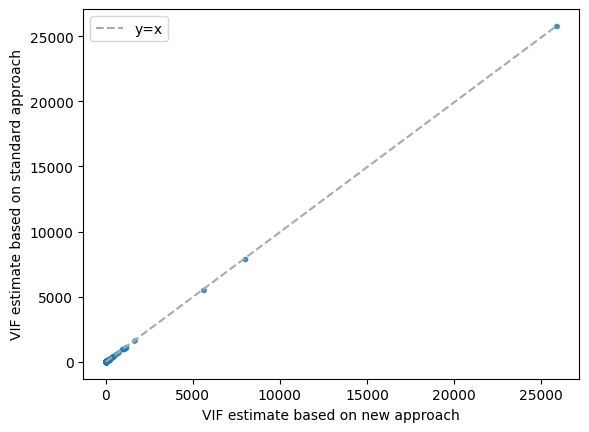

In [7]:
plt.plot(output_df['new_vif_estimate'], output_df['standard_estimate'], '.', alpha=0.5)
plt.plot(
    [0, max(output_df['new_vif_estimate'])],
    [0, max(output_df['standard_estimate'])],
    '--',
    color='darkgray',
    label='y=x',
)
plt.legend()
plt.xlabel('VIF estimate based on new approach')
plt.ylabel('VIF estimate based on standard approach')
plt.show()

Last is an illustration of how the VIF for contrasts of parameter estimates behave.

In [8]:
def est_var_contrast(contrast_cvec, desmat):
    # center and scale the design matrix to have unit variance
    nsamp = desmat.shape[0]
    desmat2 = (desmat - desmat.mean()) / ((nsamp - 1) ** 0.5 * desmat.std())
    desmat2['constant'] = 1
    return (
        contrast_cvec
        @ np.linalg.pinv(desmat2.transpose() @ desmat2)
        @ contrast_cvec.transpose()
    )

In [9]:
import sys
import os

contrasts = {'x1': 'x1', 'x2': 'x2', 'x1-x2': 'x1 - x2'}

nsims = 1000

for i in range(nsims):
    desmat = make_random_des(var_multiplier=15)
    desmat = desmat.drop(columns=['x3'])
    nsamp = desmat.shape[0]
    desmat2 = desmat.copy()
    desmat2 = (desmat2 - desmat2.mean()) / ((nsamp - 1) ** 0.5 * desmat2.std())
    desmat2['constant'] = 1
    vifs = est_contrast_vifs(desmat, contrasts)
    vifs[r'var($\beta_1-\beta_2$)'] = est_var_contrast(
        expression_to_contrast_vector('x1 - x2', desmat2.columns), desmat2
    )
    vifs['x1_x2_corr'] = desmat['x1'].corr(desmat['x2'])
    if i == 0:
        output_df = pd.DataFrame(vifs, index=[i])
    else:
        output_df = pd.concat([output_df, pd.DataFrame(vifs, index=[i])])


### Note the VIF pattern for the parameter differencs follows the variance pattern shown in the first plot

See how $VIF_{\hat\beta_1 - \hat\beta_2}$ tracks $Var(\hat\beta1 - \hat\beta2)$, supporting that the VIF estimate is working as one would expect.

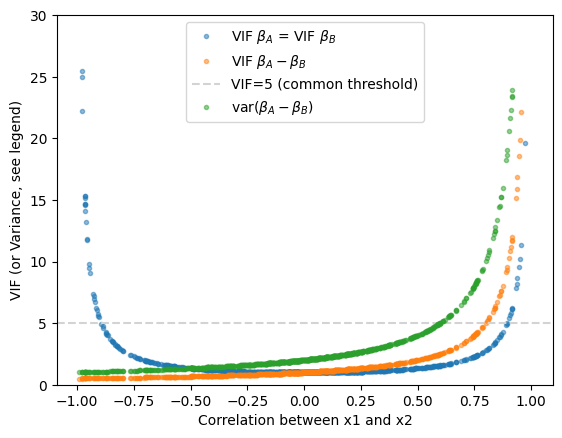

In [10]:
plt.plot(
    output_df['x1_x2_corr'],
    output_df['x1'],
    '.',
    label=r'VIF $\beta_A$ = VIF $\beta_B$',
    alpha=0.5,
)
plt.plot(
    output_df['x1_x2_corr'],
    output_df['x1-x2'],
    '.',
    label=r'VIF $\beta_A-\beta_B$',
    alpha=0.5,
)
plt.axhline(y=5, color='lightgray', linestyle='--', label='VIF=5 (common threshold)')
plt.plot(
    output_df['x1_x2_corr'],
    output_df[r'var($\beta_1-\beta_2$)'],
    '.',
    label=r'var($\beta_A-\beta_B$)',
    alpha=0.5,
)
plt.ylim(0, 30)
plt.legend()
plt.xlabel('Correlation between x1 and x2')
plt.ylabel('VIF (or Variance, see legend)')
plt.show()


## Testing it on a single subject's design matrix

In [11]:
from mid_simulations.simulation_funcs import (
    get_subdata_long,
    create_design_matrices,
    create_contrasts,
)

In [12]:
sub = 1
dataset = 'ABCD'
oversampling = 50
tr = 0.8
events = get_subdata_long(sub, dataset=dataset)
designs = create_design_matrices(events, oversampling=oversampling, tr=tr)
contrast_strings, contrast_matrices, c_pinv_xmats = create_contrasts(designs)

In [13]:
des_saturated = designs['Saturated'].copy()
des_saturated = des_saturated.loc[:, des_saturated.std() != 0]
des_saturated = (des_saturated - des_saturated.mean()) / des_saturated.std()


In [14]:
vif_comparisons = compare_vifs(des_saturated)

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_95512/3698722859.py:83: RuntimeWarning: divide by zero encountered in divide
  vif_out['new_vif_estimate'] = np.diag(true_cov_beta / cov_beta_orthog)


In [15]:
vif_comparisons

,new_vif_estimate,standard_estimate,features
0,4.836081,4.836081,Cue: LargeLoss
1,4.838456,4.838456,Cue: LargeWin
2,4.457362,4.457362,Cue: Neutral
3,4.666229,4.666229,Cue: SmallLoss
4,4.838272,4.838272,Cue: SmallWin
5,8.366157,8.366157,Feedback: LargeLossHit
6,3.257472,3.257472,Feedback: LargeLossMiss
7,7.066191,7.066191,Feedback: LargeWinHit
8,4.522452,4.522452,Feedback: LargeWinMiss
9,4.690598,4.690598,Feedback: NeutralHit
